In [ ]:
import numpy as np

import tensorflow as tf

data_set = tf.keras.datasets.mnist

(x_train , y_train) , (x_test , y_test) = data_set.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=2) #do it in any axis 1 or 2

x_test = tf.keras.utils.normalize(x_test,axis=2)    #do it in any axis 1 or 2

print(y_train.shape) #1-D array

(60000, 28, 28)


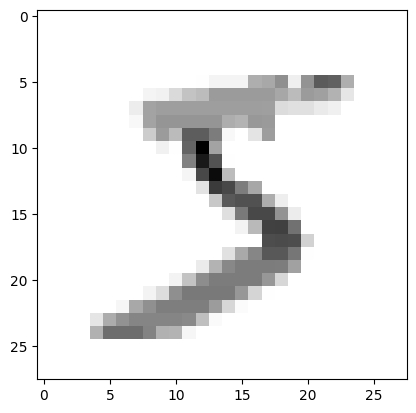

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap = plt.cm.binary )

print(np.shape(x_train))

plt.show()

In [ ]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Input(shape=x_train.shape[1:]),
        tf.keras.layers.Flatten()
    ]
)

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1) ,
              loss=tf.keras.losses.categorical_crossentropy ,
              metrics=["accuracy"] )

y_one_hot = tf.one_hot(y_train,10)

model.summary()

model.fit(x_train,y_one_hot,epochs=20)


In [ ]:
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))

x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

model2 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Input(shape=x_train.shape[1:])
    ]
)

model2.add(tf.keras.layers.Conv2D(5,
                                  (3,3),
                                  activation=tf.keras.activations.relu,
                                  ))

model2.add(tf.keras.layers.Conv2D(5,
                                  (3,3),
                                  activation=tf.keras.activations.relu,
                                  ))

model2.add(tf.keras.layers.MaxPool2D((2,2)))

model2.add(tf.keras.layers.Conv2D(5,
                                  (3,3),
                                  activation=tf.keras.activations.relu,
                                  ))

model2.add(tf.keras.layers.Conv2D(5,
                                  (3,3),
                                  activation=tf.keras.activations.relu,
                                  ))

model2.add(tf.keras.layers.MaxPool2D((2,2)))

model2.add(tf.keras.layers.Flatten())

model2.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model2.compile(optimizer=tf.keras.optimizers.SGD(),
               loss=tf.keras.losses.categorical_crossentropy,
               metrics=["accuracy"])

model2.summary()

model2.fit(x_train,y_one_hot,epochs=20)

In [8]:
y_test_hot = tf.one_hot(y_test,10)
score = model2.evaluate(x_test, y_test_hot, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.08434750884771347
Test accuracy: 0.9718000292778015
